In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns




survey_df = pd.read_csv('survey.csv')
print(survey_df.head())

   Respondent  Gender     Family_Status Migrant_Status Residential_Status  \
0           1    Male  Couple with kids        Migrant              Owner   
1           2    Male  Couple with kids       Resident              Owner   
2           3  Female            Single        Migrant             Renter   
3           4    Male  Couple with kids       Resident              Owner   
4           5  Female    Couple no kids        Migrant             Renter   

  Insurance ND_Experience Above_Poverty_Line Employment_Status  Cyclone  \
0       yes            no               yes          Full time        8   
1       yes           yes               yes          Full time        8   
2        no            no               yes          Part time        7   
3       yes           yes               yes          Full time        7   
4        no            no                 no        Unemployed        8   

   Floods  Bushfire  Tsunami  Earthquake  Landslide  Crime  
0       9         7      

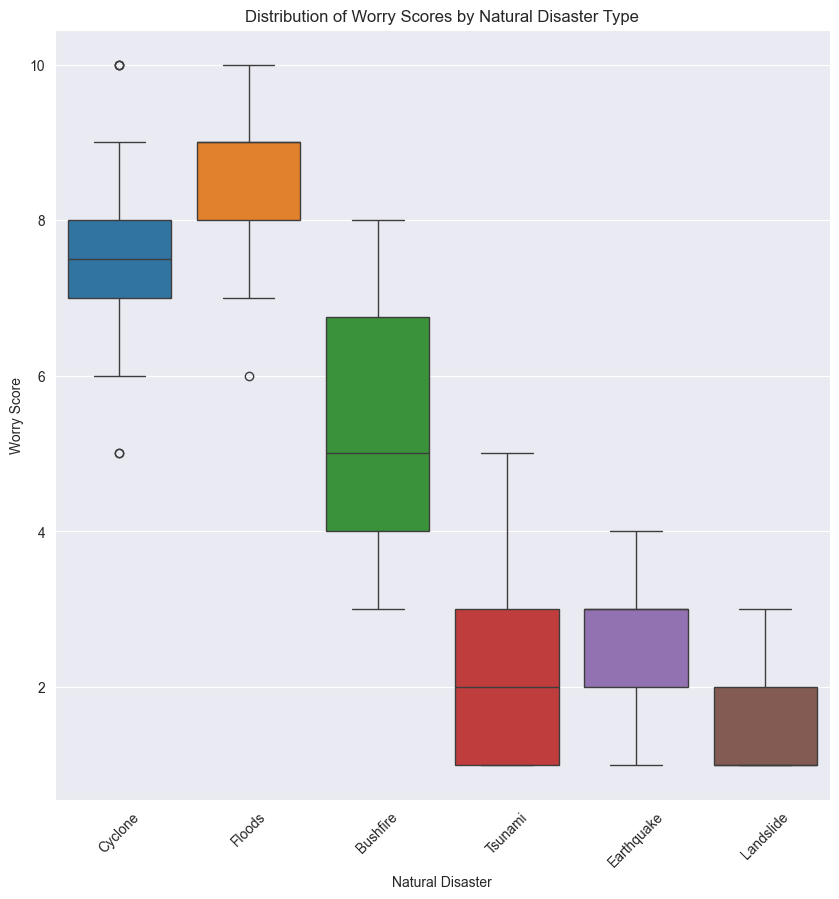

In [65]:

#Summary for each disaster, dropping crime as its not a natural disaster
#Seperate worry scores
columns_to_drop = ['Gender', 'Family_Status',
                   'Migrant_Status', 'Residential_Status', 'Insurance',
                   'ND_Experience', 'Above_Poverty_Line', 'Employment_Status', 'Crime']
survey_worry_df = survey_df.drop(columns_to_drop, axis=1)

#Summarise worry and export
worry_summary = survey_worry_df.describe()

# Create a box plot for multiple columns
plt.figure(figsize=(10, 10))
sns.boxplot(data=survey_worry_df.drop('Respondent', axis = 1))

# Add labels and title
plt.xlabel('Natural Disaster')
plt.ylabel('Worry Score')
plt.title('Distribution of Worry Scores by Natural Disaster Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

worry_summary.to_csv('summary_ND_worry.csv', index=False)





In [75]:
#Summarise for cohorts
# # Group by demographic categories and calculate the average worry scores for each type of natural disaster
gender_summary_df = survey_df[['Gender', 'Cyclone', 'Floods', 'Bushfire','Tsunami','Earthquake',  'Landslide']].groupby(['Gender']).mean()

family_summary_df= survey_df[['Family_Status', 'Cyclone', 'Floods', 'Bushfire','Tsunami', 'Earthquake', 'Landslide']].groupby(['Family_Status']).mean()

migrant_summary_df = survey_df[['Migrant_Status', 'Cyclone', 'Floods', 'Bushfire','Tsunami','Earthquake',  'Landslide']].groupby(['Migrant_Status']).mean()

residential_summary_df = survey_df[['Residential_Status', 'Cyclone', 'Floods', 'Bushfire','Tsunami','Earthquake',  'Landslide']].groupby(['Residential_Status']).mean()

insurance_summary_df = survey_df[['Insurance', 'Cyclone', 'Floods', 'Bushfire', 'Tsunami','Earthquake', 'Landslide']].groupby(['Insurance']).mean()

nd_exp_summary_df = survey_df[['ND_Experience', 'Cyclone', 'Floods', 'Bushfire','Tsunami','Earthquake',  'Landslide']].groupby(['ND_Experience']).mean()

above_pov_line_summary_df = survey_df[['Above_Poverty_Line', 'Cyclone', 'Floods', 'Bushfire','Tsunami','Earthquake',  'Landslide']].groupby(['Above_Poverty_Line']).mean()

employment_summary_df = survey_df[['Employment_Status', 'Cyclone', 'Floods', 'Bushfire','Tsunami', 'Earthquake',  'Landslide']].groupby(['Employment_Status']).mean()

print(gender_summary_df)

        Cyclone  Floods  Bushfire  Tsunami  Earthquake  Landslide
Gender                                                           
Female     7.24    8.68      5.84     2.08        3.00       1.56
Male       7.72    8.80      5.00     2.24        2.68       1.60


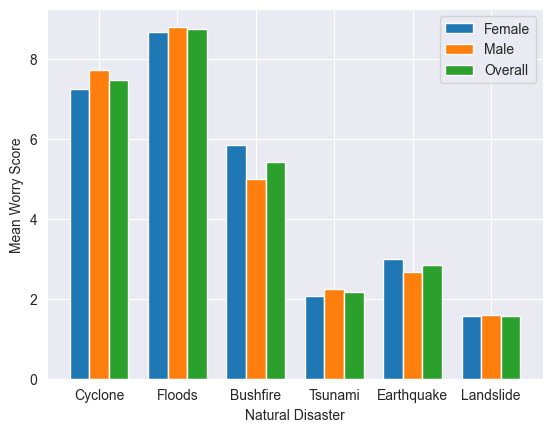

In [84]:
# Bar Graphs exploring gender
labels = ['Female', 'Male']
categories= ['Cyclone', 'Floods', 'Bushfire','Tsunami','Earthquake',  'Landslide']
female_values = gender_summary_df.iloc[0].tolist()
male_values = gender_summary_df.iloc[1].tolist()
mean_values = survey_worry_df.mean().tolist()
mean_values = mean_values[1:]

x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, female_values, width, label='Female')
bars2 = ax.bar(x, male_values, width, label='Male')
bars3 = ax.bar(x + width, mean_values, width, label='Overall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Natural Disaster')
ax.set_ylabel('Mean Worry Score')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

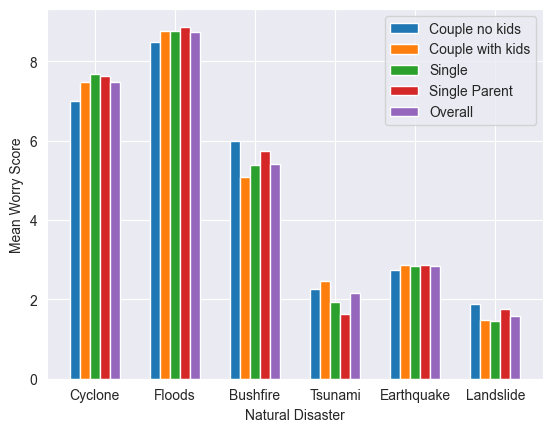

In [85]:
# Bar Graphs exploring Family Status
labels = ['Couple no kids', 'Couple with kids', 'Single', "Single Parent"]
categories= ['Cyclone', 'Floods', 'Bushfire', 'Tsunami','Earthquake', 'Landslide']
c_no_values = family_summary_df.iloc[0].tolist()
c_yes_values = family_summary_df.iloc[1].tolist()
single_values = family_summary_df.iloc[2].tolist()
single_p_values = family_summary_df.iloc[3].tolist()
mean_values = survey_worry_df.mean().tolist()
mean_values = mean_values[1:]
x = np.arange(len(categories))  # the label locations
width = 0.125  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - 2*width, c_no_values, width, label='Couple no kids')
bars2 = ax.bar(x - width, c_yes_values, width, label='Couple with kids')
bars3 = ax.bar(x, single_values, width, label='Single')
bars4 = ax.bar(x + width, single_p_values, width, label='Single Parent')
bars5 = ax.bar(x + 2*width, mean_values, width, label='Overall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Natural Disaster')
ax.set_ylabel('Mean Worry Score')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

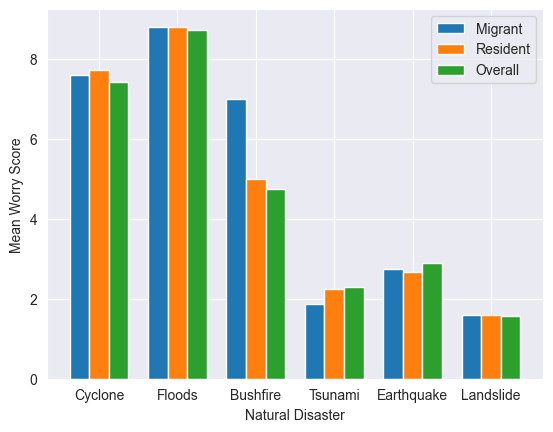

In [86]:
# Bar Graphs exploring immigration status
labels = ['Migrant', 'Resident']
categories= ['Cyclone', 'Floods', 'Bushfire','Tsunami','Earthquake',  'Landslide']
migrant_values = migrant_summary_df.iloc[0].tolist()
resident_values = migrant_summary_df.iloc[1].tolist()
mean_values = survey_worry_df.mean().tolist()
mean_values = mean_values[1:]
x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, migrant_values, width, label='Migrant')
bars2 = ax.bar(x, male_values, width, label='Resident')
bars3 = ax.bar(x + width, resident_values, width, label='Overall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Natural Disaster')
ax.set_ylabel('Mean Worry Score')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

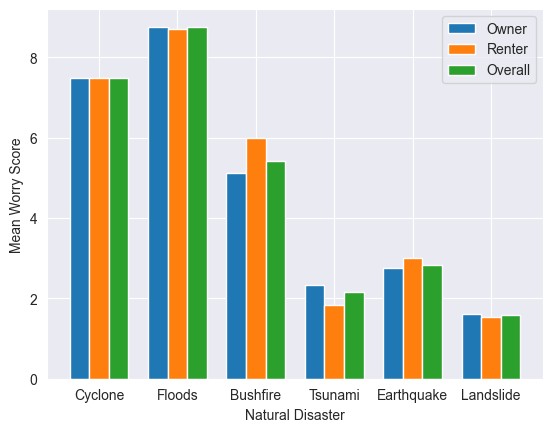

In [87]:
# Bar Graphs exploring residential ownership
labels = ['Owner', 'Renter']
categories= ['Cyclone', 'Floods', 'Bushfire', 'Tsunami','Earthquake', 'Landslide']
owner_values = residential_summary_df.iloc[0].tolist()
renter_values = residential_summary_df.iloc[1].tolist()
mean_values = survey_worry_df.mean().tolist()
mean_values = mean_values[1:]
x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, owner_values, width, label='Owner')
bars2 = ax.bar(x, renter_values, width, label='Renter')
bars3 = ax.bar(x + width, mean_values, width, label='Overall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Natural Disaster')
ax.set_ylabel('Mean Worry Score')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

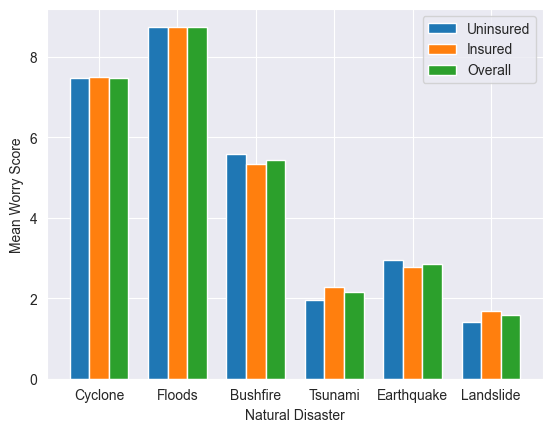

In [88]:
# Bar Graphs exploring insurance
labels = ['Uninsured', 'Insured']
categories= ['Cyclone', 'Floods', 'Bushfire', 'Tsunami', 'Earthquake','Landslide']
uninsured_values = insurance_summary_df.iloc[0].tolist()
insured_values = insurance_summary_df.iloc[1].tolist()
mean_values = survey_worry_df.mean().tolist()
mean_values = mean_values[1:]
x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, uninsured_values, width, label='Uninsured')
bars2 = ax.bar(x, insured_values, width, label='Insured')
bars3 = ax.bar(x + width, mean_values, width, label='Overall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Natural Disaster')
ax.set_ylabel('Mean Worry Score')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

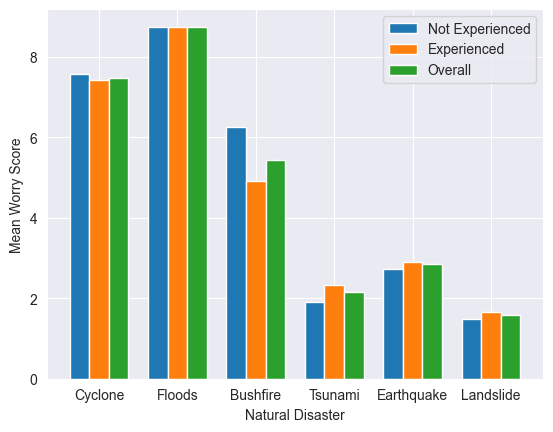

In [89]:
# Bar Graphs exploring experience
labels = ['Experienced', 'Not Experienced']
categories= ['Cyclone', 'Floods', 'Bushfire','Tsunami','Earthquake',  'Landslide']
unexp_values = nd_exp_summary_df.iloc[0].tolist()
exp_values = nd_exp_summary_df.iloc[1].tolist()
mean_values = survey_worry_df.mean().tolist()
mean_values = mean_values[1:]
x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, unexp_values, width, label='Not Experienced')
bars2 = ax.bar(x, exp_values, width, label='Experienced')
bars3 = ax.bar(x + width, mean_values, width, label='Overall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Natural Disaster')
ax.set_ylabel('Mean Worry Score')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

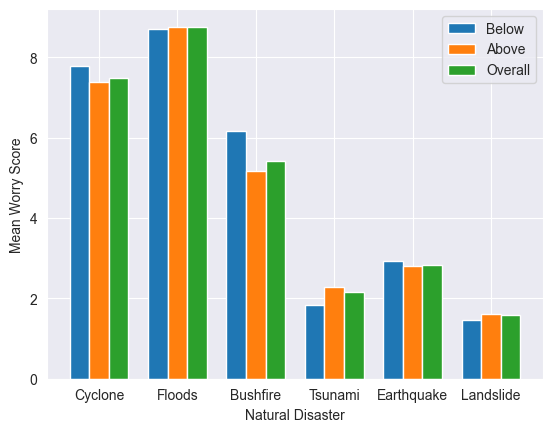

In [90]:
# Bar Graphs exploring poverty line
labels = ['Below', 'Above']
categories= ['Cyclone', 'Floods', 'Bushfire','Tsunami','Earthquake',  'Landslide']
below_values = above_pov_line_summary_df.iloc[0].tolist()
above_values = above_pov_line_summary_df.iloc[1].tolist()
mean_values = survey_worry_df.mean().tolist()
mean_values = mean_values[1:]
x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, below_values, width, label='Below')
bars2 = ax.bar(x, above_values, width, label='Above')
bars3 = ax.bar(x + width, mean_values, width, label='Overall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Natural Disaster')
ax.set_ylabel('Mean Worry Score')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

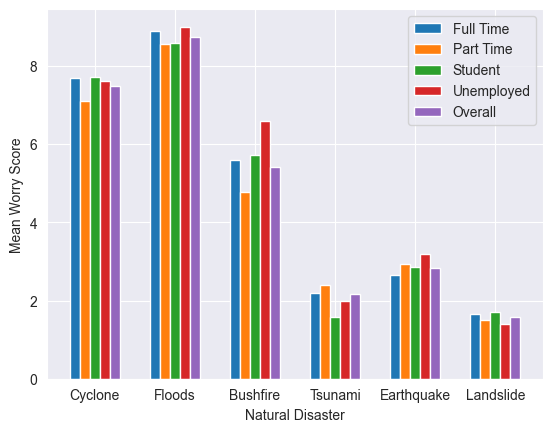

In [91]:
# Bar Graphs exploring Employment
labels = ['Full Time', 'Part Time', 'Student', "Unemployed"]
categories = ['Cyclone', 'Floods', 'Bushfire',  'Tsunami', 'Earthquake','Landslide']
ft_values = employment_summary_df.iloc[0].tolist()
pt_values = employment_summary_df.iloc[1].tolist()
student_values = employment_summary_df.iloc[2].tolist()
unemployed_values = employment_summary_df.iloc[3].tolist()
mean_values = survey_worry_df.mean().tolist()
mean_values = mean_values[1:]
x = np.arange(len(categories))  # the label locations
width = 0.125  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - 2 * width, ft_values, width, label='Full Time')
bars2 = ax.bar(x - width, pt_values, width, label='Part Time')
bars3 = ax.bar(x, student_values, width, label='Student')
bars4 = ax.bar(x + width, unemployed_values, width, label='Unemployed')
bars5 = ax.bar(x + 2 * width, mean_values, width, label='Overall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Natural Disaster')
ax.set_ylabel('Mean Worry Score')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()